Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/nilutpolk/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-13 Python-3.8.10 torch-1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 416x416 1 drowsy
Speed: 4.4ms pre-process, 30.4ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


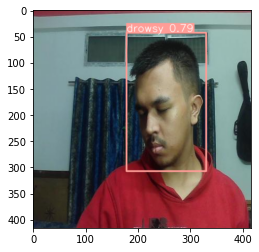

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

img = os.path.join('drowsy.jpg')

results = model(img)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


image 1/1: 416x416 1 awake
Speed: 26.4ms pre-process, 32.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


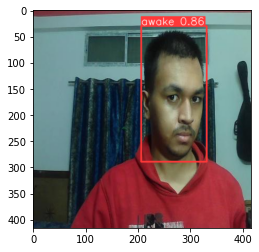

In [6]:
img = os.path.join('awake.jpg')

results = model(img)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Live Webcam Detection

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
